<a href="https://colab.research.google.com/github/rafaemac/Projetos-Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_Santiago_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [Rafael Machado](https://medium.com/@rmalmeida2)*

---

# Análise dos Dados do Airbnb - *Santiago, Chile*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>




<center><img alt="Santiago" width="80%" src="https://a5k5v6q9.stackpathcdn.com/wp-content/uploads/2016/06/santiago-do-chile-panoramica.jpg"></center>


##Santiago, Chile

Santiago, capital e maior cidade do Chile, fica em um vale circundado pelos Andes, cobertos pela neve e a cadeia de montanhas chilena. Com 5,6 milhões de habitantes, a cidade pode ser visitada em qualquer época do ano: para os amantes do inverno, as temperaturas médias chegam aos 3°C na parte mais fria do ano, e aos 30°C no verão.

Para os turistas que estão de passagem por lá, Santiago apresenta uma enorme variedade de passeios, parques, restaurantes e monumentos para se visitar. Com um sistema de metrôs eficientes, a cidade permite conciliar gastronomia, museus, estações de esqui e muito mais, tudo em um só lugar.


**Neste *notebook*, iremos analisar os dados do *Airbnb* referentes a Santiago, no Chile, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Para iniciar o projeto, iremos importar as bibliotecas de análise de dados necessárias (Pandas, MatplotLib e Seaborn) e os dados do *Airbnb* relacionados à cidade de Santiago, que podem ser obtidos [aqui](http://insideairbnb.com/get-the-data/).

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame e colocar o ID como indexador
df = pd.read_csv("/content/Santiago.csv",
                 index_col="id")

## Análise dos Dados

Antes de mergulharmos nos dados, é interessante sabermos o que cada uma das colunas disponíveis significa. No dicionário abaixo, você encontrará o significado de cada uma delas:

**Dicionário das variáveis**

* `Id` - número de identificação gerado para o imóvel em questão;
* `name`- nome da propriedade anunciada;   
* `host_id` - id ligada ao locatário da propriedade;
* `host_name` - nome do proprietário/anfitrião;
* `neighbourhood_group` - coluna sem nenhum valor válido;
* `neighbourhood` - nome do bairro;
* `latitude` - coordenada de latitude da propriedade;
* `longitude` - coordenada de longitude da propriedade;
* `room_type` - informa o tipo de quarto oferecido;
* `price` - informa o preço diário do aluguel;
* `minimum_nights` - informa o número mínimo de noites para aluguel;
* `number_of_reviews` - número de reviews que a propriedade possui;
* `last_review` - data do último review;
* `reviews_per_month` - quantidade mensal de reviews;
* `calculated_host_listings_count` - quantidade de imóveis do anfitrião;
* `availability_365` - número de dias por ano em que a propriedade esteve disponível


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-08-30,0.22,1,276,4,NaN
49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,45652,3,0,NaN,NaN,2,176,0,NaN
52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,46513,1,46,2021-11-04,0.34,3,89,1,NaN
53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.57,1,266,1,NaN
55303,Plaza Lyon piso 3,261079,Hernan,NaN,Providencia,-33.42250,-70.60920,Entire home/apt,70000,2,2,2016-11-28,0.03,3,365,0,NaN


De cara, já vemos que cada aluguel possui o seu `id`, ou seja, um número de identificação. Em seguida, temos alguns dados sobre a localização do imóvel, o tipo (pode ser um quarto, ou o imóvel inteiro, por exemplo). Além disso, é possível ver algumas informações sobre disponibilidade, número mínimo de noites e reviews.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Em um primeiro contato com o DataSet, é muito importante saber quais são as variáveis que possuímos e que tipo de dados cada uma delas nos entregará.
Por exemplo, variáveis do tipo `int` ou `float` nos mostrarão números (inteiros ou com casas decimais, respectivamente), e variáveis do tipo `object` nos mostrarão texto.

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))
# identificando os tipos de variáveis
df.dtypes

Entradas:	 9139
Variáveis:	 17


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade do DataSet depende em grande parte da quantidade de valores válidos presentes nele.
Abaixo, podemos ver que a coluna `neighbourhood_group` possui todos os seus valores nulos, e que a variável `license` também possui grande parte de seus valores nulos, o que as tornará irrelevantes para a nossa análise.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.988401
last_review                       0.356604
reviews_per_month                 0.356604
name                              0.000438
host_name                         0.000438
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
host_id                           0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood                     0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Plotaremos os histogramas das variáveis numéricas para fazer uma primeira avaliação sobre a distribuição dos dados.

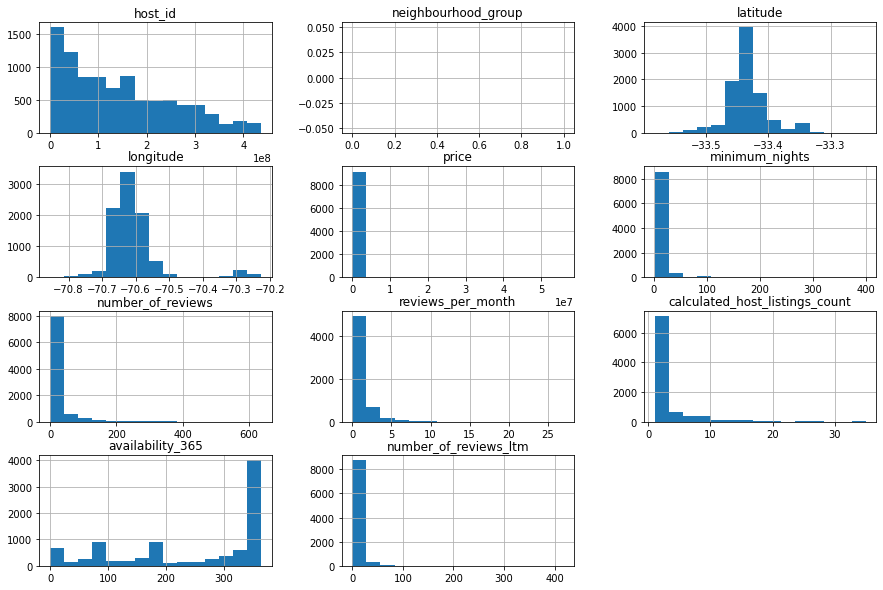

In [12]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Histogramas são gráficos de barra usados para mostrar a distribuição de frequências. 

Nos gráficos acima, é possível perceber que a distribuição de algumas variáveis é bastante ampla. Por exemplo, na variável `minimum nights` é possível perceber que existem alguns poucos imóveis que exigem uma quantidade alta de noites mínimas para aluguel.

Esse tipo de situação - onde um dado isolado difere do padrão geral de distribuição de frequências - pode acabar prejudicando a análise dos dados. Nestes casos, é importante realizar uma análise mais cuidadosa destes dados, para ver se realmente são relevantes no contexto geral do estudo.

### **Q4 - Existem *Outliers* na distribuição dos dados?**

Por definição, *outliers* são dados que diferem drasticamente do padrão. Estatisticamente falando, podemos defini-los através do IQR Score (Interquartile Range) como sendo os dados que se encontram fora do 1° e 3° quartis de uma distribuição.

<center><img alt="Santiago" width="60%" src="https://chemicalstatistician.files.wordpress.com/2013/03/normal-pdf-with-iqr.png"></center>

Ou seja, podemos definir o IQR como sendo:

IQR = Q3 - Q1

Através da função `Describe`, é possível visualizar os percentis das variáveis numéricas de nosso *dataset*.

In [11]:
#avaliando as variáveis númericas através da função describe
df[['price','minimum_nights','number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.139000e+03,9139.000000,9139.000000,5880.000000,9139.000000,9139.000000
mean,7.999007e+04,7.251231,17.942554,0.910160,3.025605,248.003830
std,8.707143e+05,26.967635,40.411300,1.378244,4.312533,127.789544
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.153400e+04,1.000000,0.000000,0.110000,1.000000,142.000000
50%,3.500000e+04,2.000000,2.000000,0.400000,1.000000,319.000000
75%,5.400000e+04,3.000000,16.000000,1.150000,3.000000,364.000000
max,5.598833e+07,400.000000,638.000000,27.000000,35.000000,365.000000


A tabela acima mostra alguns pontos interessantes:

1.   Apesar de 75% dos preços estarem abaixo de 54000 pesos chilenos, o maior valor
da coluna é de 55988330.
2.   O valor máximo de noites mínimas é maior do que o disponível em um ano;
3.   O valor mínimo de preço é 0, o que não faz sentido em se tratando de um aplicativo de aluguel de imóvieis.
4.   O valor mínimo de disponibilidade é de 0 dias, o que significa que temos na lista pelo menos um imóvel que não pode ser alugado. 

Para exemplificar o uso do parâmetro IQR, vamos dar uma olhada na coluna `price`:

O 1° quartil corresponde ao valor 25% na tabela acima, ou seja, 21534.

O 3° quartil corresponde ao valor 75% na tabela acima, ou seja, 54000.
O IQR será obtido através da subtração de um pelo outro.



In [10]:
q1_price = df.price.quantile(.25);
q3_price = df.price.quantile(.75);
iqr_price = q3_price - q1_price;

print("O IQR da variável price é", iqr_price, "pesos chilenos")

O IQR da variável price é 32466.0 pesos chilenos


Após a obtenção do IQR da variável, o passo seguinte é a definição dos limites superior e inferior da variável, pois serão eles que definirão o que é e o que não é considerado um *outlier*.

Comumente, os limites superior e inferior são definidos da seguinte maneira:

Limite Superior = Q3 + 1,5 IQR

Limite Inferior = Q1 - 1,5 IQR

Seguindo o exemplo da varíavel `price`, temos:

In [44]:
inf_price = q1_price - 1.5*iqr_price;
sup_price = q3_price + 1.5*iqr_price;

print("O limite superior da variável price é de", sup_price, "pesos chilenos")
print("O limite inferior da variável price é de", inf_price, "pesos chilenos")

O limite superior da variável price é de 102699.0 pesos chilenos
O limite inferior da variável price é de -27165.0 pesos chilenos


Como podemos ver, apesar do IQR ser um parâmetro muito interessante, não podemos simplesmente segui-lo cegamente.

O limite inferior da varíavel `price` é de -27165 pesos chilenos, o que significa que, estatisticamente, qualquer valor acima deste número poderia ser considerado. Porém, sabemos que não existem valores negativos de aluguel (seria como se o dono do imóvel tivesse que te pagar, certo?) e também que nenhum imóvel seria alugado por 0 pesos chilenos (não faria sentido algum anunciar um imóvel de graça em um aplicativo como a *Airbnb*).

Portanto, no caso da variável `price`, iremos desconsiderar valores acima de 102699 pesos e também os valores nulos.

Na sequência, iremos fazer o mesmo para a variável `minimum nights`, que também apresenta valores fora do padrão (por exemplo, alguns imóveis exigem um mínimo de 365 dias para aluguel).



In [18]:
q1_minimum = df.minimum_nights.quantile(.25)
q3_minimum = df.minimum_nights.quantile(.75)
iqr_minimum = q3_minimum - q1_minimum
print("O IQR para a variável minimum nights é de", iqr_minimum, "dias")

O IQR para a variável minimum nights é de 2.0 dias


Agora, calculando os limites superior e inferior:

In [20]:
inf_minimum = q1_minimum - 1.5*iqr_minimum;
sup_minimum = q3_minimum + 1.5*iqr_minimum;

print("O limite superior para a variável minimum nights é de", sup_minimum, "dias")
print("O limite inferior para a variável minimum nights é de", inf_minimum, "dias")

O limite superior para a variável minimum nights é de 6.0 dias
O limite inferior para a variável minimum nights é de -2.0 dias


Novamente, sabemos que não podem existir valores negativos para esta variável, e que o mínimo valor aceitável seria de 1 dia. Então, eliminaremos da nossa análise valores superiores a 6 dias e inferiores a 1 dia.

Na sequência, vamos ver visualmente como as distribuições das variáveis `price` e `minimum nights` serão afetadas após a limpeza dos dados.

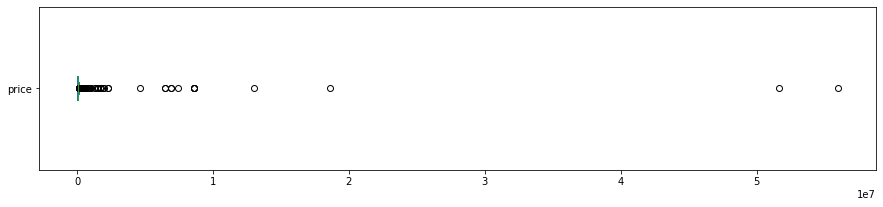

preço: valores acima de 102699 de pesos chilenos:
878 entradas
9.6072%
preço: imóveis com preço igual a zero:
1 entradas
0.0109%


In [27]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 102699 pesos chilenos para price
print("preço: valores acima de 102699 de pesos chilenos:")
print("{} entradas".format(len(df[df.price > 102699])))
print("{:.4f}%".format((len(df[df.price > 102699]) / df.shape[0])*100))

#ver a quantidade de imóveis com preço igual a zero
print("preço: imóveis com preço igual a zero:")
print("{} entradas".format(len(df[df.price == 0])))
print("{:.4f}%".format((len(df[df.price == 0]) / df.shape[0])*100))

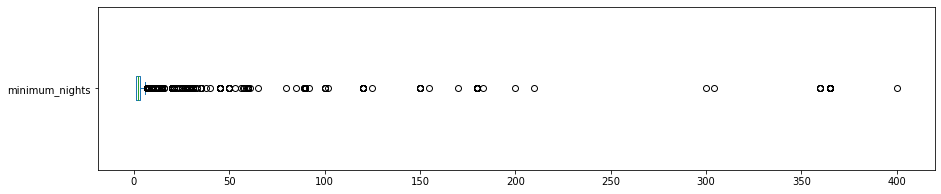

minimum_nights: valores acima de 6:
1343 entradas
14.6953%


In [21]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 6 dias para minimum_nights
print("minimum_nights: valores acima de 6:")
print("{} entradas".format(len(df[df.minimum_nights > 6])))
print("{:.4f}%".format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

Outro dados que podem ser percebidos analisando os histogramas acima:

1.   A coluna `neighbourhood_group` não apresenta nenhum valor válido;
2.   Outras colunas apresentam valores significativamente distantes da distribuição normal, porém os valores que serão mais profundamente analisados dizem respeito às colunas `price` e `minimum_nights`.

### **Q5 - Removendo os *Outliers***

Após identificar a presença de *outliers* no Dataframe atual, é hora de removê-los e gerar os histogramas novamente.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


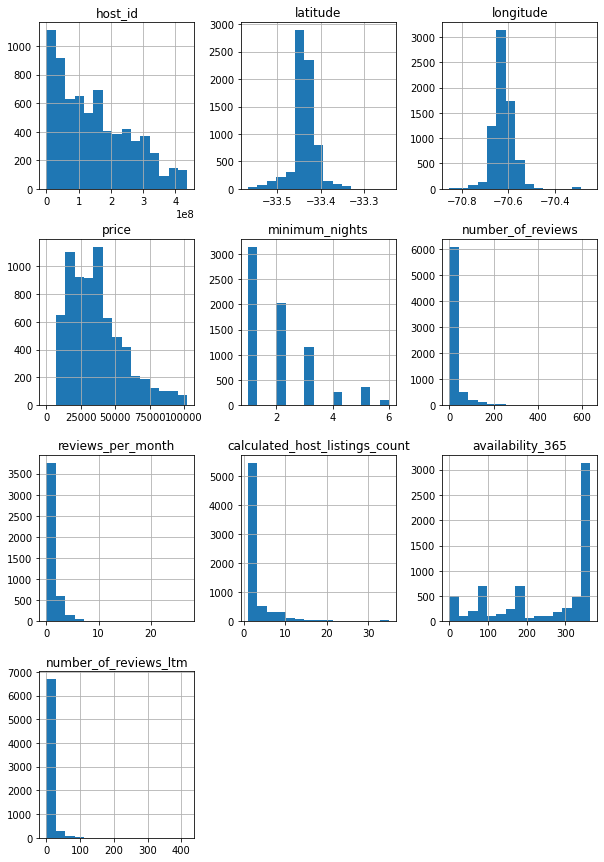

In [36]:
#remover a coluna neighbourhood_group, pois não possui valores válidos
df_clean = df.copy();
df_clean.drop('neighbourhood_group',axis=1, inplace=True);
#remover a coluna license, pois possui pouquíssimos valores válidos
df_clean.drop('license', axis=1, inplace=True);
#Removendo preços acima de 102699 de pesos
df_clean.drop(df_clean[df_clean.price> 102699 ].index, axis=0, inplace=True);
#Removendo preço igual a zero
df_clean.drop(df_clean[df.price == 0].index, axis=0, inplace=True);
#Removendo valores de noites mínimas acima de 6 dias
df_clean.drop(df_clean[df_clean.minimum_nights>6].index, axis=0, inplace=True);

#plotando novamente as variáveis
df_clean.hist(bins=15, figsize=(10,15));

Agora que já removemos os *outliers* de nosso dataset, vamos conferir as mudanças que esta limpeza acarretou. Para isso, vamos novamente usar a função `describe`.

In [31]:
df_clean[['price','minimum_nights','number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7067.000000,7067.000000,7067.000000,4602.000000,7067.000000,7067.000000
mean,36471.744588,2.009056,19.561907,1.025637,3.067355,249.114334
std,20051.150116,1.212576,42.905922,1.498416,4.302033,127.348379
min,33.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,20836.000000,1.000000,0.000000,0.110000,1.000000,143.000000
50%,33571.000000,2.000000,2.000000,0.500000,1.000000,323.000000
75%,47375.000000,3.000000,19.000000,1.340000,3.000000,364.000000
max,102502.000000,6.000000,638.000000,27.000000,35.000000,365.000000


Podemos ver que a mediana da variável `price` teve pouca variação após a limpeza, o que indica que nosso dataset é robusto o bastante para permitir essas alterações. Para a variável `minimum_nights`, a mediana não sofreu alterações.

### **Q6. Qual a média dos preços de aluguel?**

Com os *outliers* removidos, podemos obter valores mais acurados dos preço médio de aluguéis na cidade de Santiago, no Chile.

In [43]:
# ver a média da coluna "price" após a limpeza dos dados
print("O preço médio dos alugueis é de",round(df_clean.price.mean(),2), "pesos chilenos" )

O preço médio dos alugueis é de 36471.74 pesos chilenos


### **Q7. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre as variáveis.

Essa relação pode ser medida em função do coeficiente de correlação, que estabelece qual a intensidade da ligação entre as variáveis. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação;

Gerar um heatmap a partir dessa matriz, usando a biblioteca *Seaborn*.

In [37]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.066943,0.031877,0.065795,0.140256,0.069272
minimum_nights,0.066943,1.000000,0.014899,-0.125695,-0.174642,-0.142053
number_of_reviews,0.031877,0.014899,1.000000,0.626446,0.085105,-0.069121
reviews_per_month,0.065795,-0.125695,0.626446,1.000000,0.151319,0.059547
calculated_host_listings_count,0.140256,-0.174642,0.085105,0.151319,1.000000,0.133255
availability_365,0.069272,-0.142053,-0.069121,0.059547,0.133255,1.000000


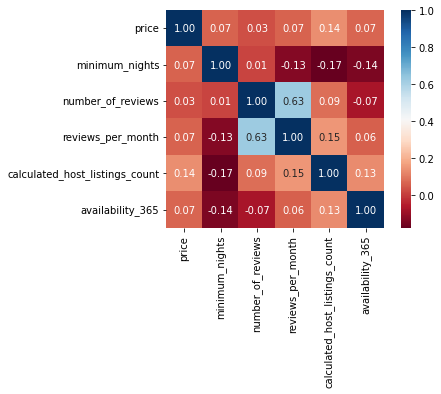

In [42]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Já é esperado que a diagonal da matriz apresente uma correlação igual a 1, ou seja, isso mostra que quando comparamos a variável a ela mesma, as equivalências entre os valores sempre serão mantidas.

Quanto mais longe do 0 o valor da correlação, significa que mais o valor de uma variável impacta na outra.

Por exemplo, podemos ver que existe uma certa correlação entre a quantidade de imóveis que o proprietário possui e os preços. A disponibilidade e a quantidade de noites mínimas também tem influência nos preços.

Na sequência, veremos mais algumas informações que podem ser obtidas deste Dataset.

### **Q8. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel usando a função `value_counts()`.

In [41]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3739
Private room       3082
Shared room         172
Hotel room           74
Name: room_type, dtype: int64

Os valores acima tem os seguintes significados:

`Entire home/apt` - Casa/apartamento completo;

`Private room` - quarto privado;

`Shared room` - quarto compartilhado;

`Hotel room` - quarto de hotel;

Podemos ver que existe a prevalência de imóveis completos para aluguel, seguido de perto por quartos privados. O número de quartos compartilhados e de quartos de hotel é bastante reduzido quando comparado aos dois tipos anteriores.

Em percentuais, os valores de cada tipo de imóvel são os seguintes:

In [40]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/df.shape[0])*100

Entire home/apt    40.912572
Private room       33.723602
Shared room         1.882044
Hotel room          0.809717
Name: room_type, dtype: float64

Podemos visualizar também o preço médio de cada tipo de imóvel:

In [45]:
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)

room_type
Hotel room         52391.662162
Entire home/apt    45143.566997
Private room       26398.767683
Shared room        21604.866279
Name: price, dtype: float64

Como podemos ver, quartos de hotel são mais caros em geral. Porém, como vimos anteriormente, eles representam uma pequena parcela dos imóveis disponíveis. Nestes casos, é interessante verificar se o preço médio dos quartos de hotel se distribui de maneira uniforme, ou se há algum anúncio em específico que está distoando dos demais e alterando a média em questão.

In [49]:
df_clean.loc[df_clean.room_type == "Hotel room"]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,,,,,,
1780552,Manquehue Apartment,9175393,Andres,Las Condes,-33.41191,-70.56742,Hotel room,68909,1,67,2021-02-19,0.67,2,0,3
3319358,Habitaciones dobles o twin B/privad,10815594,Clark,Santiago,-33.44002,-70.64289,Hotel room,23000,1,0,NaN,NaN,2,365,0
5301544,3. myLUXAPART Las Condes 1 hab,9175393,Andres,Las Condes,-33.41182,-70.56921,Hotel room,51682,1,23,2020-03-15,0.31,2,0,0
5396026,Family Aparth - 4 a 6 personas,27971868,Santiago Apartamentos Centro,Santiago,-33.43916,-70.65771,Hotel room,86136,1,1,2015-04-01,0.01,4,358,0
10428649,Aparthotel Norus Providencia-1 Dormitorio,53713616,Norus,Providencia,-33.43114,-70.63036,Hotel room,73336,1,11,2021-11-13,0.18,3,365,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37451783,Magnifique chambre et excellente place!!,269325968,Jorge,Providencia,-33.43856,-70.61791,Hotel room,36000,1,0,NaN,NaN,3,365,0
38210197,Bidasoa House,157555134,Ruben,Vitacura,-33.39905,-70.58598,Hotel room,89250,1,4,2020-03-18,0.18,1,341,0
38487108,Habitación compartida de 6 camas con baño privado,4204978,Ari,Santiago,-33.43630,-70.64672,Hotel room,12309,1,4,2021-08-25,0.52,9,165,4


Por padrão, são exibidas as 10 primeiras linhas da pesquisa. Porém, podemos ver que o número de quartos de hotel é igual a 74 (é igual ao número de linhas da tabela acima), uma quantidade razoável para ser analisada. 

Assim sendo, o valor de preço de um imóvel apenas não seria suficiente para alterar significativamente a média de preços. Logo, concluímos que quartos de hotel são geralmente mais caros para se alugar em Santiago através do *Airbnb*.


### **Q9. Qual a localidade mais cara do dataset?**

Para qualquer turista, sempre é interessante saber quais são os bairros mais caros para se hospedar em uma cidade. Obviamente, algumas vezes esta diferença de preços é justificada, seja por uma localização privilegiada, por maior segurança, etc.

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.


In [39]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Lo Espejo              97540.000000
Lo Barnechea           56979.733333
Las Condes             45850.338109
Vitacura               45632.385621
Cerro Navia            41657.833333
Pudahuel               40283.608696
Providencia            40274.294643
Renca                  38517.000000
Quilicura              35067.428571
Huechuraba             34851.605263
Recoleta               34648.873016
Santiago               34081.870869
Peñalolén              32449.388889
Estación Central       31826.336066
La Florida             31446.304762
Ñuñoa                  28733.047377
San Miguel             27730.625000
Maipú                  26488.924242
Macul                  25614.696629
Cerrillos              25396.000000
San Joaquín            24671.547619
La Cisterna            23838.586207
La Reina               23719.588235
Conchalí               22724.428571
La Granja              22529.000000
Independencia          22252.875000
El Bosque              21920.500000
Quinta Normal 

Olhando os valores acima, percebemos que o bairro Lo Espejo é disparadamente mais caro do que os demais (quase o dobro do preço do segundo colocado). 

Abaixo, veremos se este valor é representativo ou não, listando todos os imóveis localizados nele:

In [ ]:
df_clean.loc[df_clean.neighbourhood == "Lo Espejo"]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,
6386713,viaja a la copa america con comodid,33289113,Angela,Lo Espejo,-33.51676,-70.67502,Private room,97540,1,0,NaN,NaN,1,365,0,NaN


Podemos ver que apenas 1 imóvel localizado neste bairro está listado, e portanto, este valor de aluguel diário pode não ser representativo.

Abaixo, está representada a distribuição dos imóveis pelas coordenadas de latitude (x) e longitude (y).

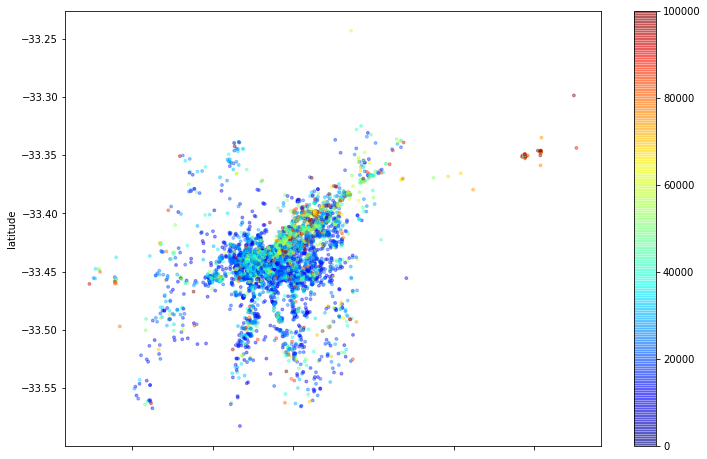

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q10. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

O mínimo de noites para aluguel é um pré-requisito especificado pelo dono da propriedade, e indica a quantidade mínima de noites que o cliente deverá pagar para ter acesso à propriedade.

In [51]:
# ver a média da coluna `minimum_nights``
round(df_clean.minimum_nights.mean(),0)

2.0

Em geral, os proprietários exigem um aluguel de pelo menos 2 dias do imóvel.

## Conclusões


Através de dados retirados do próprio site da **Airbnb**, foi possível obter alguns dados interessantes sobre a cidade de Santiago, no Chile.

Apesar do conjunto de dados possuir alguns *outliers*, algumas considerações podem ser feitas.
A primeira é que boa parte dos imóveis (50% deles, segundo este conjunto de dados) podem ser alugados por valores de até 35000 pesos chilenos (o equivalente a 205 reais por dia, na cotação atual), considerando a totalidade dos dados. Caso os *outliers* sejam desconsiderados, este valor cai para 32286 pesos(190 reais).

Disponibilidade parece não ser um problema em Santiago, pois 50% dos imóveis encontram-se disponíveis em mais de 300 dias do ano (316, para ser mais preciso).

Boa parte dos imóveis (75% deles) requer, no máximo, 3 noites de aluguel como requisito mínimo. Convenhamos que, para alguém esteja a passeio na cidade, 3 dias é um número bastante aceitável.

Por fim, devemos levar em consideração que este DataSet é apenas uma versão resumida dos dados disponíveis para Santiago. Na versão mais completa, é possível analisar 106 variáveis no total, o que seria ideal para uma análise mais aprofundada.